# Interpret Results of Trained GCN
In this notebook, I'll try to visualize the learning of a trained GCN model. This should involve the following steps:
* Interpret the predictions made by the model
* Visualize the filters of the Graph Convolution
* Do a TSNE plot of the last layer

In [1]:
import numpy as np
import pandas as pd
import my_gcn
import random, h5py
import tensorflow as tf
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
model_dir = 'training/2017_11_08_17_17_54'
data_file = '../data/preprocessing/legionella_gcn_input.h5'

with h5py.File(data_file, 'r') as f:
    network = f['network'][:]
    features = f['features'][:]
    node_names = f['gene_names'][:]
    y_train = f['y_train'][:]
    y_test = f['y_test'][:]
    if 'y_val' in f:
        y_val = f['y_val'][:]
    else:
        y_val = None
    train_mask = f['mask_train'][:]
    test_mask = f['mask_test'][:]
    if 'mask_val' in f:
        val_mask = f['mask_val'][:]
    else:
        val_mask = None

## Predictions
I want to see what the GCN predicts and if those predictions make any sense.

In [39]:
# load predictions
predictions = pd.DataFrame.from_csv(model_dir + '/predictions.tsv', sep='\t', header=0)
print (predictions.sum(axis=0))
pos_predicted = predictions[predictions.Prob_pos > .5]

labels_df = pd.DataFrame(node_names, index=node_names[:, 0], columns=['ID', 'name']).drop('ID', axis=1)
labels_df['label'] = (y_train[:,0] | y_test[:,0])
pos_predicted.sort_values(by='Prob_pos', ascending=False)

Name        TSPAN6DPM1SCYL3FGRCFHNFYALAS1LSEMA3FCFTRCYP51A...
Prob_pos                                              416.766
Prob_neg                                              9207.23
dtype: object


,Name,Prob_pos,Prob_neg
ID,,,
ENSG00000003436,TFPI,1.000000,6.567566e-33
ENSG00000108342,CSF3,1.000000,0.000000e+00
ENSG00000155755,TMEM237,1.000000,5.146510e-34
ENSG00000004399,PLXND1,1.000000,1.110854e-22
ENSG00000150938,CRIM1,1.000000,8.883035e-22
ENSG00000150637,CD226,1.000000,2.674912e-13
ENSG00000149418,ST14,1.000000,2.300933e-19
ENSG00000142185,TRPM2,1.000000,4.130369e-35
ENSG00000140199,SLC12A6,1.000000,4.261768e-30


In [41]:
labels_with_pred = labels_df.join(predictions)
labels_with_pred[labels_with_pred.label == 1]

,name,label,Name,Prob_pos,Prob_neg
ENSG00000004478,FKBP4,1,FKBP4,0.000000e+00,1.000000
ENSG00000008294,SPAG9,1,SPAG9,9.875148e-20,1.000000
ENSG00000013441,CLK1,1,CLK1,0.000000e+00,1.000000
ENSG00000086061,DNAJA1,1,DNAJA1,0.000000e+00,1.000000
ENSG00000087074,PPP1R15A,1,PPP1R15A,0.000000e+00,1.000000
ENSG00000090339,ICAM1,1,ICAM1,0.000000e+00,1.000000
ENSG00000091106,NLRC4,1,NLRC4,1.751278e-20,1.000000
ENSG00000092531,SNAP23,1,SNAP23,5.722112e-32,1.000000
ENSG00000099860,GADD45B,1,GADD45B,0.000000e+00,1.000000
ENSG00000105993,DNAJB6,1,DNAJB6,0.000000e+00,1.000000


## Visualize the Filters

In [43]:
tf.reset_default_graph()
gcn = my_gcn.MYGCN(num_classes=2, dropout_prob=0.25, num_feature_maps=36)
W_0, W_1 = gcn.get_weights(model_dir + '/model.ckpt', network, features)

INFO:tensorflow:Restoring parameters from training/2017_11_08_17_17_54/model.ckpt


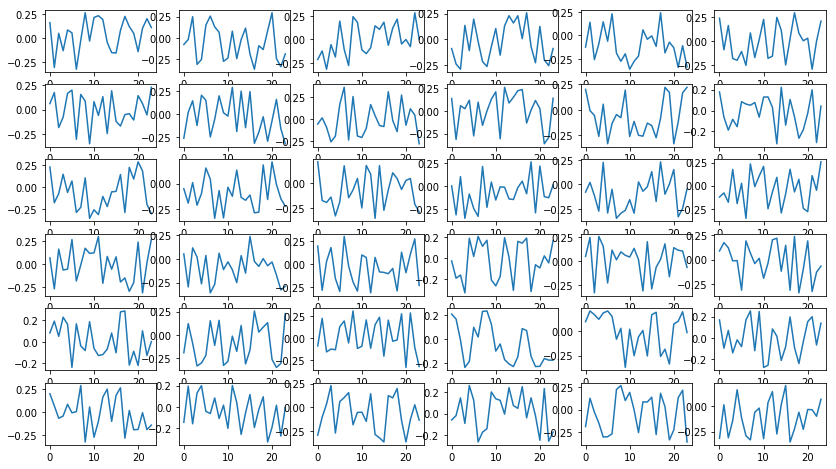

In [45]:
fig = plt.figure(figsize=(14, 8))
for i in range(W_0.shape[1]):
    plt.subplot(6, 6, i+1)
    plt.plot(W_0[:, i])

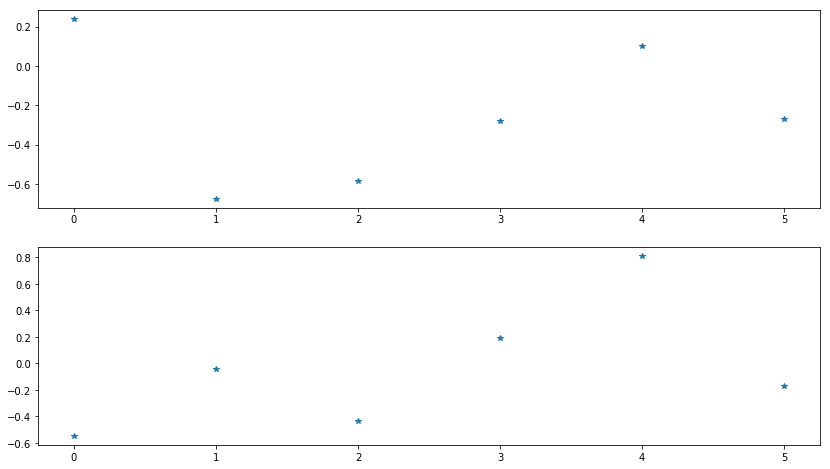

In [31]:
fig = plt.figure(figsize=(14, 8))
for i in range(W_1.shape[1]):
    plt.subplot(2, 1, i+1)
    plt.plot(W_1[:, i], '*')

In [33]:
gcn = my_gcn.MYGCN(num_classes=2, dropout_prob=0.25, num_feature_maps=6)
tf.reset_default_graph()
#gcn.load_and_evaluate(model_dir + '/model.ckpt', network, features, y_test, test_mask)
H_1, H_2 = gcn.get_hidden_activation( model_dir + '/model.ckpt', network, features)

H_2 shape: (9624, 2)
INFO:tensorflow:Restoring parameters from training/2017_11_08_17_06_39/model.ckpt
Model successfully loaded!


In [34]:
H_1.shape, H_2.shape

((9624, 6), (9624, 2))

282.129


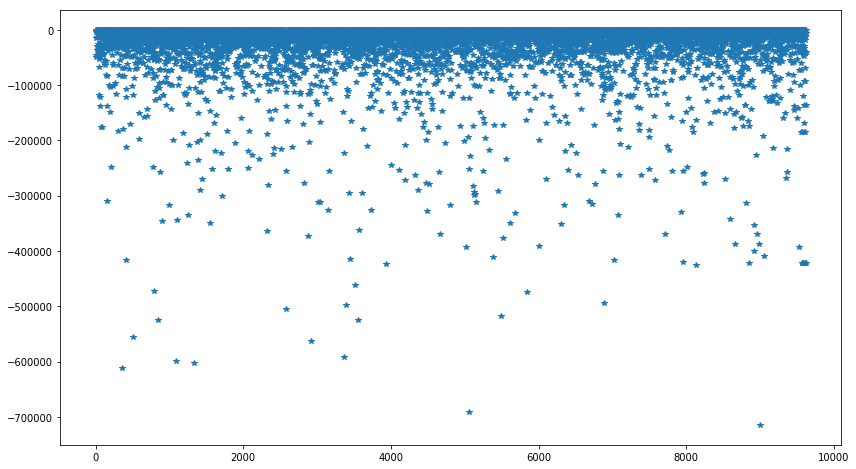

In [35]:
fig = plt.figure(figsize=(14, 8))
print (np.max(H_2[:, 0]))
plt.plot(H_2[:, 0], '*')